In [ ]:
!pip install nltk

In [ ]:
!pip install wordcloud

In [ ]:
#!pip install wordcloud

In [2]:
import nltk

In [ ]:
nltk.download()

In [3]:
import nltk

In [4]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt

In [5]:
reviews = pd.read_csv("K8 Reviews.csv")

In [6]:
reviews.tail(10)

,sentiment,review
14665,1,Worth your money.
14666,0,I am facing problem with network connection.Wh...
14667,1,Nice phone
14668,0,Not so good.
14669,0,Very poour battery parformance and prosecer
14670,1,"I really like the phone, Everything is working..."
14671,1,The Lenovo K8 Note is awesome. It takes best p...
14672,1,Awesome Gaget.. @ this price
14673,1,This phone is nice processing will be successf...
14674,1,Good product but the pakeging was not enough.


This dataset is scrapped from amazon about Lenevo K8 mobile phones.While the users gave the reviews, they also give the ratings
- Ratings 1,2,3 -> negative sentiment has a value 0 in the sentiment column
- Ratings 4,5 -> positive sentiment has a value 1 in the sentiment column

In [7]:
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

In [8]:
reviews.sentiment.value_counts(normalize = True)

0    0.52552
1    0.47448
Name: sentiment, dtype: float64

In [9]:
reviews.shape

(14675, 2)

In [10]:
reviews.review.values

array(['Good but need updates and improvements',
       "Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don't know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me.",
       'when I will get my 10% cash back.... its already 15 January..',
       ..., 'Awesome Gaget.. @ this price',
       'This phone is nice processing will be successful but dual camera is not be successfully in dual mod',
       'Good product but the pakeging was not enough.'], dtype=object)

In [11]:
sentence = "Good product, bad, ca,me,r,a"
sentence.split(",")

['Good product', ' bad', ' ca', 'me', 'r', 'a']

In [12]:
listwords = ["good product",'bad','camera']
"=".join(listwords)

'good product=bad=camera'

In [13]:
sentence = "PHOnE is GooD..."
print(sentence.lower(),sentence.upper())

phone is good... PHONE IS GOOD...


In [14]:
import re

In [15]:
allreviews = " ".join(reviews.review.values)
#allreviews = " --------$$$----- ".join(reviews.review.values)
allreviews = allreviews.lower()
allreviews = re.sub("\.",". ",allreviews)
#allreviews

In [16]:
#all_terms = allreviews.split(" ")
from nltk.tokenize import word_tokenize
all_terms = word_tokenize(allreviews)
fdist = {}
for word in all_terms:
    #fdist[word] = fdist[word] + 1
    fdist[word] = fdist.get(word,0) + 1

In [17]:
len(all_terms)

349371

In [18]:
len(set(all_terms))

13693

In [19]:
singlewordlist =[]
for key in fdist.keys():
    if fdist[key]==1:
        singlewordlist.append(key)    

In [20]:
len(singlewordlist)

8227

In [21]:
print(singlewordlist)

['everthey', 'buyi', 'disappointedpoor', 'batterypoor', 'camerawaste', 'allot', 'worn', 'ahmedabad', 'hdpf', '9998.', 'galery', 'speakernormal', 'odinary', 'any1', 'bouth', 'speekars', '😒😒☹️', 'oveheated', 'bestin', 'pricefull', 'passa', 'wasole', 'bcoms', 'loosed', 'bigggggggest', 'bakwaaaasssdo', 'lowbattery', 'lowpls', 'rm', 'featurs', 'phone😍😍', 'breakups', 'vcf', 'werorst', '10000.', 'cleare', 'optionthirdly', '10999/-fourthly', 'nerve', 'fifthly', 'ensure', 'sleeping', 'cameradesignperformance', 'wrest', '☺️🙂', 'sleekness', 'controler', 'defuces', 'allahabad', 'raping', 'poorwords', 'sep-17', '25dec17', 'effecting', 'popularity', 'productcamera', 'greatsound', 'greatover', '😪', 'punching', 'sofwares', 'prpperly', 'detachable', 'xt1902-3', 'm2cb2', 'backlogs1', '3100', 'steadier', 'supplementary', 'grasp', 'sofa', 'districts', 'adjusted', 'bodru', '4000mhz', 'hrsit', 'deduced', 'lookswise', 'kharida', 'usme', 'ly', 'layla', 'inka', 'khelke', 'kenya', 'kaharidna', 'youif', 'holic',

In [22]:
fdist.keys()

dict_keys(['good', 'but', 'need', 'updates', 'and', 'improvements', 'worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', 'backup', 'only', '6', 'to', '7', 'hours', 'with', 'internet', 'uses', 'even', 'if', 'put', 'idle', 'its', 'getting', 'discharged', '.', 'this', 'biggest', 'lie', 'from', 'amazon', '&', 'lenove', 'which', 'not', 'at', 'all', 'expected', 'they', 'are', 'making', 'full', 'by', 'saying', 'that', '4000mah', 'booster', 'charger', 'fake', 'it', 'takes', 'least', '4', '5', 'be', 'fully', 'charged', 'do', "n't", 'know', 'how', 'lenovo', 'will', 'survive', 'of', 'us', 'please', 'don', ';', 't', 'go', 'for', 'else', 'you', 'regret', 'me', 'when', 'get', 'my', '10', '%', 'cash', 'back', 'already', '15', 'january', 'the', 'phone', 'everthey', 'changed', 'last', 'problem', 'still', 'same', 'returning', 'highly', 'disappointing', "'m", 'telling', 'buyi', 'totally', 'disappointedpoor', 'batterypoor', 'camerawaste', 'money', 'awesome', 

In [23]:
326625/17602

18.556129985228953

In [24]:
from string import punctuation

In [25]:
print(list(punctuation))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [26]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
from nltk.corpus import stopwords
stop_nltk = stopwords.words("english")
stop_nltk.remove("not")
punct_stop = list(punctuation) + stop_nltk + ["lenovo","phone","k8","amazon","product"]

In [28]:
listwords = [word for word in word_tokenize(allreviews) if word not in punct_stop and len(word) >2]

In [29]:
len(set(listwords))

12996

In [30]:
len(listwords)

167299

In [31]:
140000/200

700.0

In [32]:
len(punct_stop)

215

In [33]:
fdist = {}
for word in listwords:
    #fdist[word] = fdist[word] + 1
    fdist[word] = fdist.get(word,0) + 1

In [34]:
fdist['good']

6120

In [35]:
fdist.get("Good",0)

0

In [36]:
sentence = "phone is good, really good. nothing good about amazon, bad is amazon. really bad."
sentence

'phone is good, really good. nothing good about amazon, bad is amazon. really bad.'

In [37]:
print(sentence.split(" "), len(sentence.split(" ")), len(set(sentence.split(" "))))
print(word_tokenize(sentence), len(word_tokenize(sentence)),len(set(word_tokenize(sentence))))

['phone', 'is', 'good,', 'really', 'good.', 'nothing', 'good', 'about', 'amazon,', 'bad', 'is', 'amazon.', 'really', 'bad.'] 14 12
['phone', 'is', 'good', ',', 'really', 'good', '.', 'nothing', 'good', 'about', 'amazon', ',', 'bad', 'is', 'amazon', '.', 'really', 'bad', '.'] 19 10


In [38]:
print(fdist["Good"],fdist['good'],fdist['good.'],fdist['gOOd'],fdist['good,'],fdist['GOOD'],fdist['goood'],fdist['gud'],fdist['good...'])

KeyError: 'Good'

In [ ]:
#good....

In [40]:
import re
sentence1 = "Phone is good.... camera is good bad, OS is okay"
sentence2 = re.sub("\.","",sentence1)
sentence2

'Phone is good camera is good bad, OS is okay'

In [41]:
sentence3 = re.sub("good","perfect",sentence1)
sentence3

'Phone is perfect.... camera is perfect bad, OS is okay'

In [42]:
fdist.get("Good",6510651651651)

6510651651651

In [43]:
fdist.get("Goodgsdrsdghsdg",6510651651651)

6510651651651

In [44]:
fdist

{'good': 6120,
 'need': 257,
 'updates': 145,
 'improvements': 7,
 'worst': 959,
 'mobile': 2511,
 'bought': 315,
 'ever': 317,
 'battery': 3466,
 'draining': 205,
 'like': 962,
 'hell': 42,
 'backup': 682,
 'hours': 424,
 'internet': 151,
 'uses': 25,
 'even': 838,
 'put': 66,
 'idle': 72,
 'getting': 409,
 'discharged': 23,
 'biggest': 30,
 'lie': 6,
 'lenove': 6,
 'not': 6124,
 'expected': 215,
 'making': 38,
 'full': 368,
 'saying': 34,
 '4000mah': 111,
 'booster': 6,
 'charger': 493,
 'fake': 66,
 'takes': 297,
 'least': 36,
 'fully': 129,
 'charged': 134,
 "n't": 1860,
 'know': 145,
 'survive': 8,
 'please': 414,
 'else': 69,
 'regret': 30,
 'get': 527,
 'cash': 35,
 'back': 693,
 'already': 77,
 'january': 11,
 'everthey': 1,
 'changed': 29,
 'last': 294,
 'problem': 1408,
 'still': 205,
 'returning': 36,
 'highly': 37,
 'disappointing': 55,
 'telling': 10,
 'buyi': 1,
 'totally': 138,
 'disappointedpoor': 1,
 'batterypoor': 1,
 'camerawaste': 1,
 'money': 675,
 'awesome': 716,


In [45]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)
df_dist

,words,freq
0,good,6120
1,need,257
2,updates,145
3,improvements,7
4,worst,959
...,...,...
12991,parformance,1
12992,prosecer,1
12993,whater,1
12994,gaget,1


In [46]:
#30321 - 26707  - 17602


<AxesSubplot:xlabel='words'>

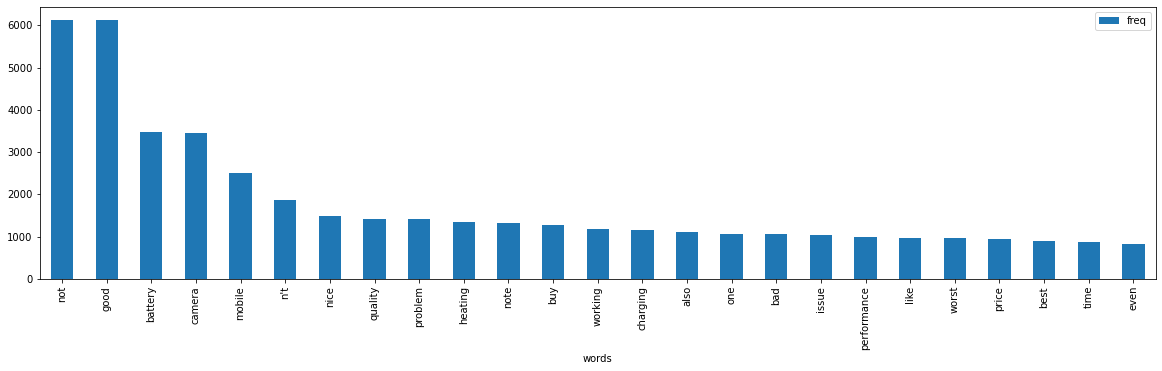

In [47]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

In [ ]:
from wordcloud import WordCloud

In [48]:
reviews_combined = " ".join(listwords)

In [ ]:
#Total words in reviews
len(reviews_combined)

In [ ]:
reviews_combined[:200]

In [ ]:
word_cloud = WordCloud().generate_from_text(reviews_combined)

In [ ]:
#?WordCloud

In [ ]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

In [ ]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150,stopwords = []).\
generate_from_text(reviews_combined)

In [ ]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [49]:
all_terms = []
fdist = {}
all_terms = reviews_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [50]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

<AxesSubplot:xlabel='words'>

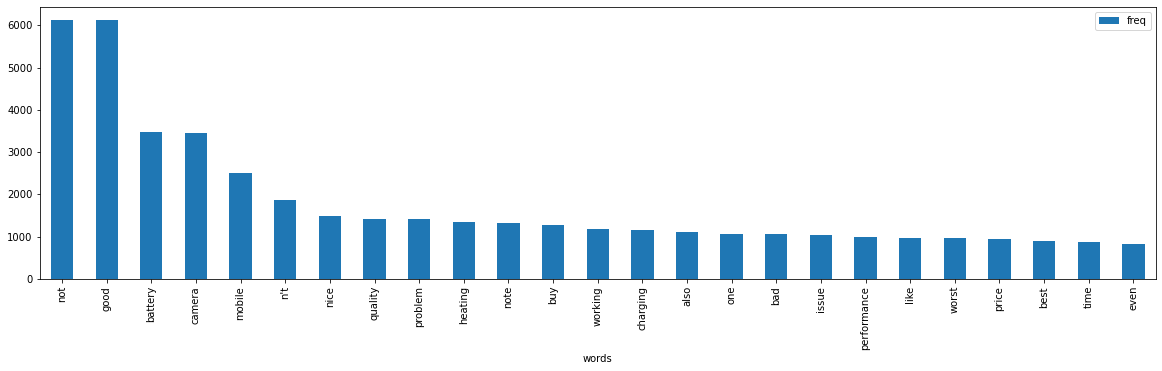

In [51]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

Problems with the above visuals
    1.case is non uniform
    2. punctuations and stop words
    3. words with different tense forms like charged, charging, charges has its root form in charge

In [52]:
#1. case normalization and tokenizing

In [53]:
reviews.review[:10]

0               Good but need updates and improvements
1    Worst mobile i have bought ever, Battery is dr...
2    when I will get my 10% cash back.... its alrea...
3                                                 Good
4    The worst phone everThey have changed the last...
5    Only I'm telling don't buyI'm totally disappoi...
6    Phone is awesome. But while charging, it heats...
7                      The battery level has worn down
8    It's over hitting problems...and phone hanging...
9    A lot of glitches dont buy this thing better g...
Name: review, dtype: object

In [54]:
from nltk.tokenize import word_tokenize

In [55]:
#All Reviews tokenized and in lower case
all_terms = word_tokenize(reviews_combined.lower())

In [56]:
print(all_terms[:20])

['good', 'need', 'updates', 'improvements', 'worst', 'mobile', 'bought', 'ever', 'battery', 'draining', 'like', 'hell', 'backup', 'hours', 'internet', 'uses', 'even', 'put', 'mobile', 'idle']


In [57]:
len(set(all_terms))

12984

In [58]:
#visualizing the frequency distrinution

In [59]:
from nltk.probability import FreqDist

In [60]:
fdist = FreqDist(all_terms)
fdist

FreqDist({'not': 6125, 'good': 6120, 'battery': 3467, 'camera': 3447, 'mobile': 2511, "n't": 1860, 'nice': 1481, 'quality': 1419, 'problem': 1408, 'heating': 1354, ...})

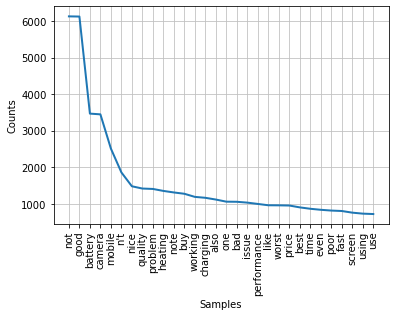

In [61]:
fdist.plot(30,cumulative=False)
plt.show()

In [62]:
from string import punctuation
from nltk.corpus import stopwords

In [63]:
stop_nltk = stopwords.words("english")

In [64]:
print(stop_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [65]:
stop_updated = stop_nltk + list(punctuation) + ["...",".."] + ["phone", "mobile","lenovo","k8","product"]

below code removes:
1. stopwords, 
2. punct's,
3. custom stop words,
4. words with lenght less than 2

In [66]:
reviews_updated1 = [word for word in all_terms if word not in stop_updated and len(word) > 2]

In [67]:
print(reviews_updated1[:20])

['good', 'need', 'updates', 'improvements', 'worst', 'bought', 'ever', 'battery', 'draining', 'like', 'hell', 'backup', 'hours', 'internet', 'uses', 'even', 'put', 'idle', 'getting', 'discharged']


In [68]:
len(set(reviews_updated1))

12974

In [69]:
from nltk.stem import SnowballStemmer
stemmer_s = SnowballStemmer("english")

In [70]:
reviews_updated_stem = [stemmer_s.stem(word) for word in reviews_updated1]

In [71]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [72]:
reviews_updated_lemm = [lemm.lemmatize(word) for word in reviews_updated1]
reviews_updated_lemm = [lemm.lemmatize(word, pos = 'v') for word in reviews_updated_lemm]
reviews_updated_lemm = [lemm.lemmatize(word, pos = 'a') for word in reviews_updated_lemm]
reviews_updated_lemm = [lemm.lemmatize(word, pos = 's') for word in reviews_updated_lemm]
reviews_updated_lemm = [lemm.lemmatize(word, pos = 'r') for word in reviews_updated_lemm]
reviews_updated_lemm = [lemm.lemmatize(word, pos = 'n') for word in reviews_updated_lemm]

In [73]:
print(len(set(reviews_updated_stem)),len(set(reviews_updated_lemm)))

10645 11249


In [74]:
lemmcleanreviews = " ".join(reviews_updated_lemm)

In [75]:
all_terms = word_tokenize(lemmcleanreviews)
fdist = {}
for word in all_terms:
    #fdist[word] = fdist[word] + 1
    fdist[word] = fdist.get(word,0) + 1

In [76]:
all_terms = word_tokenize(" ".join(reviews_updated_stem))
fdist = {}
for word in all_terms:
    #fdist[word] = fdist[word] + 1
    fdist[word] = fdist.get(word,0) + 1

In [77]:
singlewordliststem =[]
for key in fdist.keys():
    if fdist[key]==1:
        singlewordliststem.append(key)
len(singlewordliststem)

6793

In [78]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

<AxesSubplot:xlabel='words'>

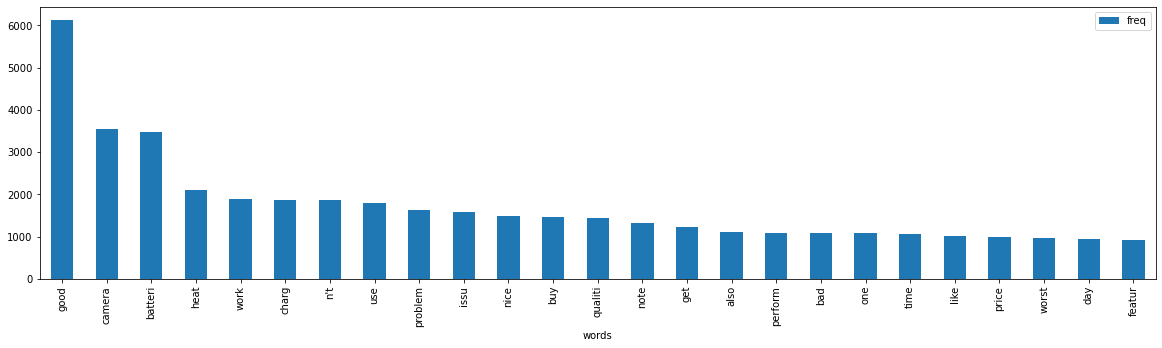

In [79]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

In [80]:
singlewordlist =[]
for key in fdist.keys():
    if fdist[key]==1:
        singlewordlist.append(key)
len(singlewordlist)

6793

In [81]:
print(singlewordlist)

['everthey', 'buyi', 'disappointedpoor', 'batterypoor', 'camerawast', 'allot', 'worn', 'ahmedabad', 'hdpf', '9998.', 'galeri', 'speakernorm', 'odinari', 'any1', 'bouth', '😒😒☹️', 'oveh', 'bestin', 'priceful', 'passa', 'bcom', 'bigggggggest', 'bakwaaaasssdo', 'lowbatteri', 'lowpl', 'phone😍😍', 'breakup', 'vcf', 'werorst', '10000.', 'optionthird', '10999/-fourth', 'nerv', 'fifth', 'cameradesignperform', 'wrest', '☺️🙂', 'defuc', 'allahabad', 'rape', 'poorword', 'sep-17', '25dec17', 'productcamera', 'greatsound', 'greatov', 'prpper', 'detach', 'xt1902-3', 'm2cb2', 'backlogs1', '3100', 'steadier', 'supplementari', 'sofa', 'district', 'bodru', '4000mhz', 'hrsit', 'deduc', 'lookswis', 'kharida', 'usm', 'layla', 'inka', 'khelk', 'kenya', 'kaharidna', 'youif', 'holic', 'selfiein', 'parfomc', 'instruct', 'rasidul', 'kaji', 'aftwr', 'goodbelow', 'storagesat', 'dubbl', 'opet', 'flactuat', 'pc/laptop', 'supurb', 'threat', 'vain', 'rethink', 'phoen', 'meagain', 'peiceand', 'requirementsgood', 'speedgo

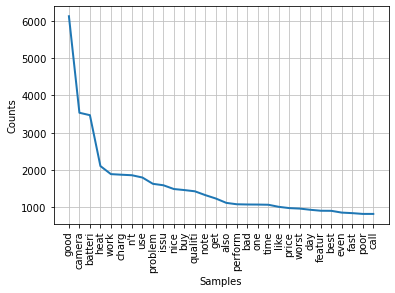

In [82]:
fdist1 = FreqDist(all_terms)
fdist1.plot(30,cumulative=False)
plt.show()

In [83]:
check = ['caring','not','quickly','saw','quicker','quickest','better']

In [84]:
check = [lemm.lemmatize(word) for word in check]
check = [lemm.lemmatize(word, pos = 'v') for word in check]
check = [lemm.lemmatize(word, pos = 'a') for word in check]
check = [lemm.lemmatize(word, pos = 's') for word in check]
check = [lemm.lemmatize(word, pos = 'r') for word in check]
check = [lemm.lemmatize(word, pos = 'n') for word in check]

In [85]:
check

['care', 'not', 'quickly', 'saw', 'quick', 'quick', 'good']

In [86]:
#Stememr reduces the number of distinct words in the corpus to a greater exten

# Word cloud on cleaned dataset

In [87]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150, stopwords = []).\
generate_from_text(lemmcleanreviews)

NameError: name 'WordCloud' is not defined

In [ ]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

# We will now apply these cleaning techniques on all the reviews by writing a UDF

In [88]:
from nltk.corpus import wordnet
def notdrop(words):    
    new_words = []
    temp_word = ''
    for word in words:
        antonyms = []
        if word == 'not':
            temp_word = 'not_'
        elif temp_word == 'not_':
            for syn in wordnet.synsets(word):
                for s in syn.lemmas():
                    for a in s.antonyms():
                        antonyms.append(a.name())
            if len(antonyms) >= 1:
                word = antonyms[0]
            else:
                word = temp_word + word
            temp_word = ''
        if word != 'not':
            new_words.append(word)

    return(new_words)

In [89]:
# Define function that takes in a raw string, returns a clean string
def clean_txtlemm(sent):
    sent = re.sub(r"\.",". ",sent)
    sent = re.sub(r"[^\w\s]+"," ",sent)
    tokens1 = word_tokenize(sent.lower())
    for i in range(len(tokens1)):
        tokens1[i]=re.sub(r"n't","not",tokens1[i])
    #take care of negation
    tokens = notdrop(tokens1)
    lemmatized1 = [lemm.lemmatize(term, pos = 'v')  for term in tokens if term not in stop_updated and len(term) > 2]
    lemmatized2 = [lemm.lemmatize(term, pos = 'a')  for term in lemmatized1] 
    lemmatized3 = [lemm.lemmatize(term, pos = 's')  for term in lemmatized2] 
    lemmatized4 = [lemm.lemmatize(term, pos = 'r')  for term in lemmatized3] 
    lemmatized5 = [lemm.lemmatize(term, pos = 'n')  for term in lemmatized4]
    lemmatized6 = [term for term in lemmatized5 if term not in singlewordlist]
    res = " ".join(lemmatized6)
    return res

In [90]:
%%time
reviews['clean_reviewlemm'] = reviews.review.apply(clean_txtlemm)

Wall time: 2min 21s


In [91]:
reviews_combinedlemm = " ".join(reviews.clean_reviewlemm.values)

In [92]:
all_termsupdatedlemm = word_tokenize(reviews_combinedlemm.lower())
print(len(set(all_termsupdatedlemm)),len((all_termsupdatedlemm)))

7058 153670


In [93]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [101]:
# create a bigram count vectorizer object
#bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2))
unigram_count_vectorizer = CountVectorizer(ngram_range=(1,2),max_features = 1000)
tfidf_count_vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features = 1000)

In [102]:
X_unigram = unigram_count_vectorizer.fit_transform(reviews['clean_reviewlemm'])
tfidfscores = tfidf_count_vectorizer.fit_transform(reviews['clean_reviewlemm'])
# Creating a DTM
DTM_unigram = pd.DataFrame(X_unigram.toarray(), columns=unigram_count_vectorizer.get_feature_names())
TFIDFunigram = pd.DataFrame(tfidfscores.toarray(), columns=tfidf_count_vectorizer.get_feature_names())

In [104]:
DTM_unigram

,100,13mp,14k,1st,2017,2018,2nd,3rd,4000,4000 mah,...,would,write,write review,wrong,wrost,year,yes,yesterday,yet,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
(151000)/(14675*1000)

0.010289608177172062

In [106]:
tfidfscores

<14675x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 135177 stored elements in Compressed Sparse Row format>

In [107]:
TFIDFunigram

,100,13mp,14k,1st,2017,2018,2nd,3rd,4000,4000 mah,...,would,write,write review,wrong,wrost,year,yes,yesterday,yet,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
reviews

,sentiment,review,clean_reviewlemm
0,1,Good but need updates and improvements,good need update improvement
1,0,"Worst mobile i have bought ever, Battery is dr...",bad buy ever battery drain like hell backup ho...
2,1,when I will get my 10% cash back.... its alrea...,get cash back already january
3,1,Good,good
4,0,The worst phone everThey have changed the last...,bad change last problem still amazon not_retur...
...,...,...,...
14670,1,"I really like the phone, Everything is working...",really like everything work fine use
14671,1,The Lenovo K8 Note is awesome. It takes best p...,note awesome take best picture dual camera sli...
14672,1,Awesome Gaget.. @ this price,awesome price
14673,1,This phone is nice processing will be successf...,nice process successful dual camera differ suc...


In [109]:
X_unigram

<14675x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 135177 stored elements in Compressed Sparse Row format>

In [121]:
TFIDFunigram

,100,13mp,14k,1st,2017,2018,2nd,3rd,4000,4000 mah,...,would,write,write review,wrong,wrost,year,yes,yesterday,yet,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
X = reviews.clean_reviewlemm.values
y = reviews.sentiment.values

In [123]:
X

array(['good need update improvement',
       'bad buy ever battery drain like hell backup hour internet use even put idle get discharge big lie amazon lenove not_at expect make full say battery 4000mah booster charger fake take least hour fully charge know survive make full please else regret like',
       'get cash back already january', ..., 'awesome price',
       'nice process successful dual camera differ successfully dual mod',
       'good pakeging not_enough'], dtype=object)

In [124]:
y

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1809)

In [126]:
from sklearn.linear_model import LogisticRegression as LR
logreg1 = LR()
logreg2 = LR()

In [127]:
vectorizer1 = CountVectorizer(ngram_range=(1,3),max_features = 1000)
vectorizer2 = TfidfVectorizer(ngram_range=(1,3),max_features = 1000)

In [128]:
X_train_DTM = vectorizer1.fit_transform(X_train)
X_train_TFIDF = vectorizer2.fit_transform(X_train)

In [129]:
logreg1.fit(X_train_DTM.todense(),y_train)
logreg2.fit(X_train_TFIDF.todense(),y_train)

D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [130]:
y_train_pred1 = logreg1.predict(X_train_DTM.todense())
y_train_pred2 = logreg2.predict(X_train_TFIDF.todense())

In [131]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [132]:
accuracy_score(y_train,y_train_pred1)

0.8927597955706985

In [158]:
accuracy_score(y_train,y_train_pred2)

0.8807495741056218

In [159]:
#How many paramters in the logistic regression model?
#1001
#1/(1+ exp(-alpha + beta1*x1 + beta2*x2 +... + beta1000*x1000))

In [160]:
X_test_DTM = vectorizer1.transform(X_test)
X_test_TFIDF = vectorizer2.transform(X_test)

In [161]:
y_test_pred1 = logreg1.predict(X_test_DTM)
y_test_pred2 = logreg2.predict(X_test_TFIDF)

In [162]:
accuracy_score(y_test,y_test_pred1)

0.8609880749574106

In [163]:
accuracy_score(y_test,y_test_pred2)

0.862350936967632

In [99]:
confusion_matrix(y_test,y_test_pred2,labels = [1,0])

NameError: name 'confusion_matrix' is not defined

In [143]:
confusion_matrix(y_test,y_test_pred2,labels = [0,1])

array([[1384,  153],
       [ 248, 1150]], dtype=int64)

In [144]:
review1 = "bad phone, pathetic battery"
review2 = "amazing phone, great camera"
review3 = "bad phone but good camera"
review4 = "bad phone but good camera good good"
review5 = "bad phone but good camera good good good"
lreview = [review1,review2,review3,review4,review5]

In [145]:
crev1 = vectorizer1.transform(lreview)
crev2 = vectorizer2.transform(lreview)

In [150]:
rpred1 = logreg1.predict(crev1.todense())
rpred2 = logreg2.predict(crev2.todense())

In [151]:
print(rpred1)
print(rpred2)

[0 1 0 0 1]
[0 1 0 1 1]


# Plot the bar graph for top 25 frequenctly used bigrams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# create a bigram count vectorizer object
bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2),max_features = 1500)

In [ ]:
X_bigram = bigram_count_vectorizer.fit_transform(reviews['clean_review'])

# Creating a DTM
DTM_bigram = pd.DataFrame(X_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names())

In [ ]:
bigram_count_vectorizer.get_feature_names()[:20]

In [ ]:
DTM_bigram.head()

In [ ]:
DTM_bigram.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5)) 

In the amazon case study dataset
Find the top 5 relavent reviews which has the below words
 - "battery drain"
 -"Good camera"
If there is a clash in the scores, review at index 0 has higher precedence than at index 1 and so on....

# Sentiment Classification

### Sentiment Prediction Strategy 1: Word based scoring 

In [ ]:
afinn = pd.read_csv("AFINN-111.txt", sep="\t", header=None)
afinn.columns = ['Term','Score']
term_scores = dict(afinn.values)

In [ ]:
def get_sentiment(sent):
    tokens = word_tokenize(sent.lower())
    score = 0
    for term in tokens:
        score += term_scores.get(term,0)
    return score

In [ ]:
reviews['sent_score'] = reviews.clean_review.apply(get_sentiment)

In [ ]:
reviews.head()

In [ ]:
reviews.sent_score.hist()

#sentiment Prediction
    if the sent_score > 0 predicted sentiment is 1
    else the predicted sentiment is 0

In [ ]:
reviews['sent_prediction'] = reviews.sent_score.apply(lambda x:1 if x>0 else 0)

In [ ]:
reviews.head()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
confusion_matrix(reviews.sentiment,reviews.sent_prediction)

In [ ]:
accuracy_score(reviews.sentiment,reviews.sent_prediction)

In [ ]:
#lets build a udf which takes a text as input and does all the above cleaning steps
# one review at a time will be passed from the the reviews column to this function
#based on the outcome of this function, you should be able to add a new column in the data frame
def  clean_txt_new(sent):
    tokens = word_tokenize(sent.lower().replace('[^a-z ]',' '))
    cleaned_token = [(term) for term in tokens 
               if term not in stop_updated and len(term) > 2] 
    res = " ".join(cleaned_token)
    return res

In [ ]:
reviews['clean_review_new'] = reviews.review.apply(clean_txt_new)

In [ ]:
reviews.head()

In [ ]:
reviews['sent_score_new'] = reviews.clean_review_new.apply(get_sentiment)

In [ ]:
reviews['sent_prediction_new'] = reviews.sent_score_new.apply(lambda x:1 if x>0 else 0)

In [ ]:
accuracy_score(reviews.sentiment,reviews.sent_prediction_new)

### Sentiment Prediction Strategy 2: Using popular package - Vader

In [133]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [134]:
def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']

In [135]:
reviews['score_vader'] = reviews.review.apply(get_vader_sentiment)

In [142]:
reviews['score_vaderclean'] = reviews.clean_reviewlemm.apply(get_vader_sentiment)

In [136]:
reviews

,sentiment,review,clean_reviewlemm,score_vader
0,1,Good but need updates and improvements,good need update improvement,0.5994
1,0,"Worst mobile i have bought ever, Battery is dr...",bad buy ever battery drain like hell backup ho...,-0.8720
2,1,when I will get my 10% cash back.... its alrea...,get cash back already january,0.0000
3,1,Good,good,0.4404
4,0,The worst phone everThey have changed the last...,bad change last problem still amazon not_retur...,-0.8289
...,...,...,...,...
14670,1,"I really like the phone, Everything is working...",really like everything work fine use,0.5563
14671,1,The Lenovo K8 Note is awesome. It takes best p...,note awesome take best picture dual camera sli...,0.9337
14672,1,Awesome Gaget.. @ this price,awesome price,0.6249
14673,1,This phone is nice processing will be successf...,nice process successful dual camera differ suc...,-0.0366


In [137]:
reviews['sent_prediction_vader'] = reviews.score_vader.\
apply(lambda x:1 if x>0.05 else 0)

In [143]:
reviews['sent_prediction_vaderclean'] = reviews.score_vaderclean.\
apply(lambda x:1 if x>0.05 else 0)

In [141]:
analyser.polarity_scores('phone is good.battery is bad')

{'neg': 0.467, 'neu': 0.533, 'pos': 0.0, 'compound': -0.5423}

In [148]:
analyser.polarity_scores('phone is good. battery is bad')

{'neg': 0.337, 'neu': 0.385, 'pos': 0.279, 'compound': -0.1531}

In [150]:
analyser.polarity_scores('phone. is battery bad good is ')

{'neg': 0.337, 'neu': 0.385, 'pos': 0.279, 'compound': -0.1531}

In [138]:
accuracy_score(reviews.sentiment,reviews.sent_prediction_vader)

0.7831005110732538

In [144]:
accuracy_score(reviews.sentiment,reviews.sent_prediction_vaderclean)

0.7753321976149915

In [ ]:
confusion_matrix(reviews.sentiment,reviews.sent_prediction_vader)

### Document clustering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(max_features=150)

In [ ]:
X = tfidfvectorizer.fit_transform(reviews['clean_review'])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
num_clusters = 6
km = KMeans(n_clusters=num_clusters)
km.fit(X)

In [ ]:
pred_cluster = km.predict(X)
reviews['cluster_predicted'] = pred_cluster
reviews['cluster_predicted'].value_counts()

In [ ]:
pred_cluster.shape

In [ ]:
km.cluster_centers_.shape

in TFIDF or in DTM every word is a feature
when these words are clustered, the cluster center value for every feature tells us the centeroid of the word relavencies/frequencies.

Higher the cluster centeroid for that feature, higher will be value of word relevency/frequency.

In [ ]:
print("Top 5 terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidfvectorizer.get_feature_names()
for i in range(num_clusters):
    print ("Cluster %d:" % i),
    for ind in order_centroids[i, : 5]:
        print (' %s' % terms[ind]),
    print

In [ ]:
group = reviews[reviews['cluster_predicted'] == 1]
text = ' '.join(reviews['clean_review'])
wc = WordCloud(background_color='white').generate(text)
plt.imshow(wc)

### Cosine Similarity

In [151]:
from sklearn.metrics.pairwise import cosine_similarity

In [156]:
tfidfvectorizer = TfidfVectorizer(max_features=1000)

In [157]:
X = tfidfvectorizer.fit_transform(reviews['clean_reviewlemm'])
df_tfidf = pd.DataFrame(X.toarray(),columns=tfidfvectorizer.get_feature_names())

In [158]:
#Check the cosine similarity with the second and the third reviews
cosine_similarity(df_tfidf[1:2], df_tfidf[2:3])

array([[0.03279958]])

In [171]:
cs = cosine_similarity(df_tfidf.T)
cswords = pd.DataFrame(cs, columns = tfidfvectorizer.get_feature_names(), index = tfidfvectorizer.get_feature_names())

In [172]:
def get_similar_words(input_word, sim_mat):
    cos_vals = sim_mat[input_word].sort_values(ascending=False)
    similar_words = cos_vals.drop(input_word).head(5)
    return similar_words

In [173]:
sim_mat = cosine_similarity(df_tfidf.T)

sim_mat = pd.DataFrame(sim_mat, columns= df_tfidf.columns, index= df_tfidf.columns)

get_similar_words('drain', sim_mat)

fast       0.425313
battery    0.354528
quickly    0.191302
fastly     0.157621
charge     0.140712
Name: drain, dtype: float64

In [174]:
#Understanding how the function works
sim_mat['charge'].sort_values(ascending=False).drop('charge').head(5)

take     0.360231
turbo    0.319106
hour     0.314308
heat     0.231980
full     0.219260
Name: charge, dtype: float64

In [175]:
reviews.iloc[11]

sentiment                                                                     1
review                        Good phone but charger not working / damage wi...
clean_reviewlemm                          good charger idle damage within month
score_vader                                                              0.6588
sent_prediction_vader                                                         1
score_vaderclean                                                        -0.0772
sent_prediction_vaderclean                                                    0
Name: 11, dtype: object

In [176]:
cs[11,0]

0.0

In [177]:
word = 'evil'
cswords[word].sort_values(ascending = False).head(10)

evil       1.000000
camera     0.167248
battery    0.152786
backup     0.100798
quality    0.091431
also       0.066932
heat       0.058717
back       0.057932
enough     0.049489
problem    0.041551
Name: evil, dtype: float64